# Assignment 3: ICP + Non-linear least squares optimization

TEAM-NAME: Whatevs

YOUR-ID: 2019101017, 201901050

YOUR-NAME: Shaurya Dewan, Ashwin Rao

## Instructions

* You are not allowed to use any external libraries (other than ones being imported below).
* The deadline for this assignment is **15-09-21** at 11:55pm.
* Plagiarism is **strictly prohibited**

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


# Non Linear Least Squares Optimization

## 1.1 Gradient Descent
Implement the gradient descent algorithm using numpy and what you have learned from class to solve for the parameters of a gaussian distribution.
To understand the task in more detail and look at a worked through example, checkout the subsequent section. You have to implement the same using just numpy functions. You can refer to [Shubodh's notes](https://www.notion.so/saishubodh/From-linear-algebra-to-non-linear-weighted-least-squares-optimization-13cf17d318be4d45bb8577c4d3ea4a02) on the same to get a better grasp of the concept before implementing it.
* Experiment with the number of iterations.
* Experiment with the learning rate.
* Experiment with the tolerance.

Display your results using matplotlib by plotting graphs for 
* The cost function value vs the number of iterations
* The Ground Truth data values and the predicted data values.

Your plots are expected to contain information similar to the plot below:

<!-- <figure> -->
<img src='./helpers/sample_plt.png' alt=drawing width=500 height=600>

<!-- <figcaption align='center'><b>A sample plot, you can use your own plotting template</b></figcaption>
</figure> -->
<!-- head over to [this page](https://saishubodh.notion.site/Non-Linear-Least-Squares-Solved-example-Computing-Jacobian-for-a-Gaussian-Gradient-Descent-7fd11ebfee034f8ca89cc78c8f1d24d9) -->

## Worked out Example using Gradient Descent

A Gaussian distribution parametrized by $a,m,s$ is given by:

$$ y(x;a,m,s)=a \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right) \tag{1}$$

### Jacobian of Gaussian

$$\mathbf{J}_y=\left[\frac{\partial y}{\partial a} \quad \frac{\partial y}{\partial m} \quad \frac{\partial y}{\partial s}\right] \\
= \left[ \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right); \frac{a (x-m)}{s^2} \exp\left(\frac{-(x-m)^{2}}{2 s^{2}}\right);  \frac{a (x-m)^2}{s^3}\exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right)\right]$$

## Problem at hand

> Given a set of observations $y_{obs}$ and $x_{obs}$ we want to find the optimum parameters $a,m,s$ which best fit our observations given an initial estimate.

Our observations would generally be erroneous and given to us, but for the sake of knowing how good our model is performing, let us generate the observations ourselves by assuming the actual "actual" parameter values as $a_{gt}=10; m_{gt} =0; s_{gt} =20$ ($gt$ stands for ground truth). We will try to estimate these values based on our observations and let us see how close we get to "actual" parameters. Note that in reality we obviously don't have these parameters as that is exactly what we want to estimate in the first place. So let us consider the following setup, we have:

- Number of observations, $num\_obs = 50$
- Our 50 set of observations would be
    - $x_{obs} = np.linspace(-25,25, num\_obs)$
    - $y_{obs} = y(x_{obs};a_{gt},m_{gt},s_{gt})$  from $(1)$

Reference:

→[linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)

- Say we are given initial estimate as:

    $$a_0=10; \quad m_0=13; \quad s_0=19.12$$

### Residual and error to be minimized

Okay, now we have set of observations and an initial estimate of parameters. We would now want to minimize an error that would give us optimum parameters.

The $residual$ would be given by

$$ r(a,m,s) = \left[ a \exp \left(\frac{-(x_{obs}-m)^{2}}{2 s^{2}}\right) - y_{obs}\ \right]$$

where we'd want to minimize $\|r\|^2$. Note that $r$ is a non-linear function in $(a,m,s)$.

Also, note that since $y$ (and $x$) are observations in the above equation, after simplification, we get $\mathbf{J}_r = \mathbf{J}_y$ [above](https://www.notion.so/c9e6f71b67a44bb8b366df2fccfc12d0) (since $y_{obs}$ is a constant).

Let us apply Gradient Descent method for minimization here. From [Table I](https://www.notion.so/From-linear-algebra-to-non-linear-weighted-least-squares-optimization-13cf17d318be4d45bb8577c4d3ea4a02),  

$$\Delta \mathbf{k} = - \alpha \mathbf{J_F} = -\alpha \mathbf{J}_r^{\top} {r}(\mathbf{k})$$

Note that $\mathbf{J_F}$ is the Jacobian of "non-linear least squares" function $\mathbf{F}$ while $\mathbf{J}_r$ is the Jacobian of the residual. 

where $\mathbf{k}$ is $[a,m,s]^T$. 

- Some hyperparameters:
    - Learning rate, $lr = 0.01$
    - Maximum number of iterations, $num\_iter=200$
    - Tolerance, $tol = 1e-15$

## Solution for 1 iteration

To see how each step looks like, let us solve for 1 iteration and for simpler calculations, assume we have 3 observations, 

$$x_{obs}= \left[ -25, 0, 25 \right]^T, y_{obs} = \left[  4.5783, 10, 4.5783 \right]^T. $$

With our initial estimate as $\mathbf{k_0} = [a_0=10, \quad m_0=13, \quad s_0=19.12]^T$, the residual would be 

$$ r(a_0,m_0,s_0) = \left[ a_0 \exp \left(\frac{-(x_{obs}-m_0)^{2}}{2 s_0^{2}}\right) - y_{obs}\ \right]$$

Therefore, $r=[-3.19068466, -2.0637411 , 3.63398058]^T$.

### Gradient Computation

Gradient, $\mathbf{J_F}$=

$$\mathbf{J_r}^{\top} \mathbf{r}(\mathbf{k})$$

We have calculated residual already [above](https://www.notion.so/c9e6f71b67a44bb8b366df2fccfc12d0), let us calculate the Jacobian $\mathbf{J_r}$.

$$\mathbf{J}_r
= \left[ \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right); \frac{a (x-m)}{s^2} \exp\left(\frac{-(x-m)^{2}}{2 s^{2}}\right);  \frac{a (x-m)^2}{s^3}\exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right)\right]$$

$$\implies \mathbf{J_r} = \left[ \begin{array}{rrr}0.1387649 & 0.79362589, & 0.82123142 \\-0.14424057 & -0.28221715  & 0.26956967 \\0.28667059 & 0.19188405, & 0.16918599\end{array}\right]$$

So ,

$$\mathbf{J_F} = \mathbf{J_r}^{\top} \mathbf{r}(\mathbf{k})$$

$$\mathbf{r}(\mathbf{k}) =  \left[ \begin{array}{r}-3.19068466 \\ -2.0637411 \\ 3.63398058 \end{array} \right]$$

$$ \begin{aligned} \implies \mathbf{J_F} = \left[ \begin{array}{r} 0.89667553 \\ -1.25248392 \\-2.56179392\end{array} \right] \end{aligned}$$

### Update step

$$
\Delta \mathbf{k} = - \alpha \mathbf{J_F} \\
\mathbf{k}^{t+1} = \mathbf{k}^t + \Delta \mathbf{k}
$$

Here, $\alpha$ our learning rate is 0.01.

$$
\Delta \mathbf{k} = - \alpha\times\left[ \begin{array}{r} 
0.89667553 \\ -1.25248392 \\-2.56179392
\end{array} \right] = \left[ \begin{array}{r}
-0.00896676 \\ 0.01252484 \\0.02561794
\end{array}\right]
$$

$$
\mathbf{k}^{1} = \mathbf{k}^{0} + \Delta \mathbf{k} \\ \left[\begin{array}{r} 10 \\ 13 \\ 19.12 \end{array}\right] + \left[\begin{array}{c} 9.99103324 \\ 13.01252484 \\ 19.14561794 \end{array} \right]
$$

With just one iteration with very few observations, we can see that we have gotten *slightly* more closer to our GT parameter  $a_{gt}=10; m_{gt} =0; s_{gt} =20$. Our initial estimate was $[a_0=10, \quad m_0=13, \quad s_0=19.12]$. However, the above might not be noticeable enough: Hence you need to code it for more iterations and convince yourself as follows:

In [2]:
from helpers.func import make_gaussian
   
def gradDescent(grad, x, parameters, residual, lr):
    return np.matmul(-lr * grad(x, *parameters[0]), residual).transpose()

def optimize(obj, grad, x, y, updateFunc=gradDescent, pltTitle='Gradient Descent', init=[10, 13, 19.12], lr=0.01, tolerance=1e-5, iterNum=200):
    parameters = np.reshape(init, (1, -1))
    lastIter = iterNum
    lossHis = []
    
    for i in range(iterNum):
        residual = np.reshape(obj(x, *parameters[0]), (-1, 1)) - np.reshape(y, (-1, 1))
        lossHis.append(np.sum(abs(residual)))
        if np.max(abs(residual)) < tolerance:
            lastIter = i + 1
            break
            
        parameters += updateFunc(grad, x, parameters, residual, lr)
        
    plt.figure()
    plt.plot(range(lastIter), lossHis)
    plt.title('Loss vs Number of Iterations for ' + pltTitle)
    return parameters[0]

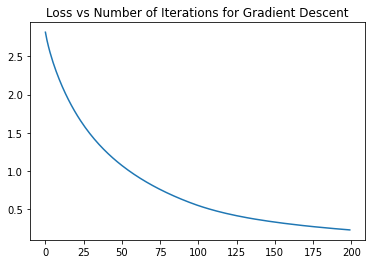

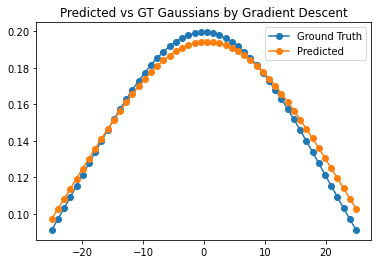

In [3]:
def gaussian_grad(x, a, mean, std):
    Ja = np.exp(-(x - mean) ** 2 / (2 * std ** 2)) / (math.sqrt(2 * math.pi) * std)
    Jm = a * (x - mean) * np.exp(-(x - mean) ** 2 / (2 * std ** 2)) / (math.sqrt(2 * math.pi) * std ** 3)
    Js1 = a * ((x - mean) ** 2) * np.exp(-(x - mean) ** 2 / (2 * std ** 2)) / (math.sqrt(2 * math.pi) * std ** 4)
    Js2 = -a * np.exp(-(x - mean) ** 2 / (2 * std ** 2)) / (math.sqrt(2 * math.pi) * std ** 2)
    Js = Js1 + Js2
    return np.vstack((Ja, Jm, Js))
    
gt = [10, 0, 20]
obsNum = 50
x = np.linspace(-25, 25, obsNum)
y = make_gaussian(x, *gt)
preds = make_gaussian(x, *optimize(make_gaussian, gaussian_grad, x, y, lr=20))

plt.figure()
plt.plot(x, y, '-o', label='Ground Truth')
plt.plot(x, preds, '-o', label='Predicted')
plt.title('Predicted vs GT Gaussians by Gradient Descent')
plt.legend()
plt.show()

## 1.2: Another Non-Linear function
Now that you've got the hang of computing the jacobian matrix for a non-linear function via the aid of an example, try to compute the jacobian of a secondary gaussian function by carrying out steps similar to what has been shown above. The function is plotted below:
<img src='./helpers/non_linear.png' alt=drawing width=500 height=600>
Using the computed jacobian, optimise for the four parameters using gradient descent, where the parameters to be estimated are: 

$p_1$ = 2,  $p_2$ = 8,  $p_3$ = 4,  $p_4$ = 8. 

Do this for $x_{obs} = np.linspace(-20,30, num\_obs)$,
where $num\_obs$ is 50.



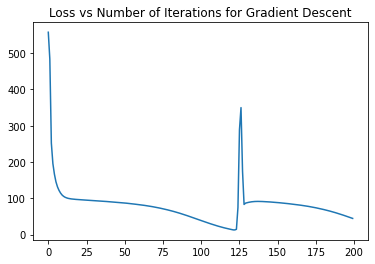

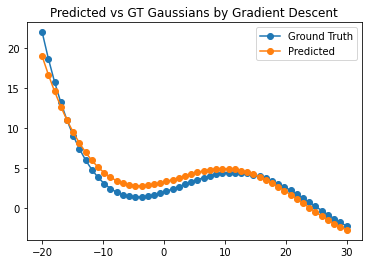

In [4]:
from helpers.func import make_non_linear

def non_linear_grad(x, p1, p2, p3, p4):
    Jp1 = np.exp(-x / p2)
    Jp2 = p1 * x * np.exp(-x / p2) / (p2 ** 2)
    Jp3 = np.sin(x / p4)
    Jp4 = -p3 * x * np.cos(x / p4) / (p4 ** 2)
    return np.vstack((Jp1, Jp2, Jp3, Jp4))
    
gt2 = [2, 8, 4, 8]
obsNum2 = 50
x2 = np.linspace(-20, 30, obsNum2)
y2 = make_non_linear(x2, *gt2)
init = np.random.uniform(0, 20, (1, 4))
preds2 = make_non_linear(x2, *optimize(make_non_linear, non_linear_grad, x2, y2, init=init))

plt.figure()
plt.plot(x2, y2, '-o', label='Ground Truth')
plt.plot(x2, preds2, '-o', label='Predicted')
plt.title('Predicted vs GT Gaussians by Gradient Descent')
plt.legend()
plt.show()

## 1.3: Different Optimizers

Replace gradient descent with Gauss-Newton and Levenberg Marquardt algorithms and repeat question 1.1. 

To quickly recap, Gauss-Newton and Levenberg Marquardt are alternate update rules to the standard gradient descent. Gauss Newton updates work as:

$$\delta x = -(J^TJ)^{-1}J^Tf(x)$$

Levenberg Marquardt lies somewhere between Gauss Newton and Gradient Descent algorithms by blending the two formulations. As a result, when at a steep cliff, LM takes small steps to avoid overshooting, and when at a gentle slope, LM takes bigger steps:


$$\delta x = -(J^TJ + \lambda I)^{-1}J^Tf(x)$$

**Questions**
   * 1. How does the choice of initial estimate and learning rate affect convergence? Observations and analysis from repeated runs with modified hyperparameters will suffice.
   * 2. Do you notice any difference between the three optimizers? Why do you think that is? (If you are unable to see a clear trend, what would you expect in general based on what you know about them)

In [5]:
def gaussNewton(grad, x, parameters, residual, lr):
    J = grad(x, *parameters[0])
    a = np.linalg.inv(np.matmul(J, J.transpose()))
    return np.matmul(a, np.matmul(-J, residual)).transpose()

def LM(grad, x, parameters, residual, lr):
    J = grad(x, *parameters[0])
    a = np.matmul(J, J.transpose()) + lr * np.identity(np.shape(J)[0])
    return np.matmul(np.linalg.inv(a), np.matmul(-J, residual)).transpose()

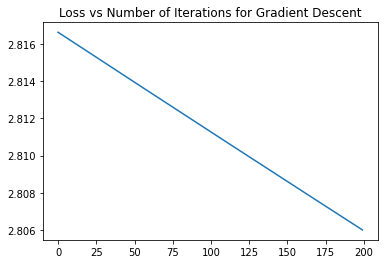

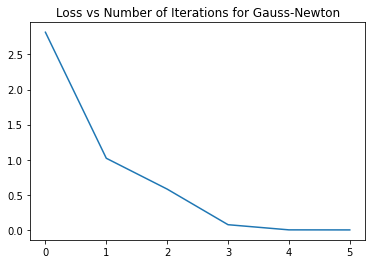

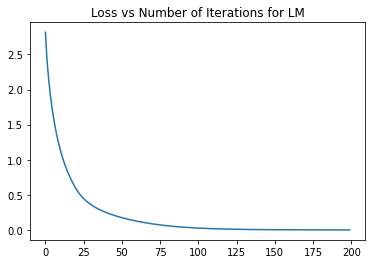

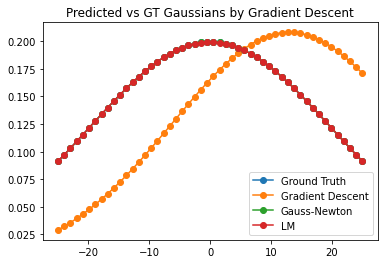

In [12]:
predsGD = make_gaussian(x, *optimize(make_gaussian, gaussian_grad, x, y))
predsGN = make_gaussian(x, *optimize(make_gaussian, gaussian_grad, x, y, gaussNewton, 'Gauss-Newton'))
predsLM = make_gaussian(x, *optimize(make_gaussian, gaussian_grad, x, y, LM, 'LM'))

plt.figure()
plt.plot(x, y, '-o', label='Ground Truth')
plt.plot(x, predsGD, '-o', label='Gradient Descent')
plt.plot(x, predsGN, '-o', label='Gauss-Newton')
plt.plot(x, predsLM, '-o', label='LM')
plt.title('Predicted vs GT Gaussians by Gradient Descent')
plt.legend()
plt.show()

1. The larger the learning rate is, the faster the algorithm will converge as the steps taken will be larger. However, if the learning rate is too large then it is also possible that the algorithm never converges or converges even slower than a smaller learning rate as it will oscillate about the minima.
The better/closer the initial estimate is to the ground truth, the faster the algorithm will converge as fewer steps will be required.
2. It is observed that the Gauss-Newton variation requires the least number of iterations, followed by LM, followed by gradient descent. This is because the steps are largest for Gauss-Newton without overshooting, followed by LM, followed by gradient descent.

# 2. Iterative Closest Point

In this subsection, we will code the Iterative Closest Point algorithm to find the alignment between two point clouds without known correspondences. The point cloud that you will be using is the same as the one that you used in Assignment 1.

## 2.1: Procrustes alignment

1. Write a function that takes two point clouds as input wherein the corresponding points between the two point clouds are located at the same index and returns the transformation matrix between them.
2. Use the bunny point cloud and perform the procrustes alignment between the two bunnies. Compute the absolute alignment error after aligning the two bunnies.
3. Make sure your code is modular as we will use this function in the next sub-part.
4. Prove mathematically why the Procrustes alignment gives the best aligning transform between point clouds with known correspondences.


### 2.1.1

In [7]:
def findTransformationMatrix(R, t):
    t = t.reshape((-1, 1))
    return np.vstack((np.hstack((R, t)), np.array([0, 0, 0, 1])))

def findRotationAndTranslation(T):
    dim = T.shape[0] - 1
    R = T[:dim, :dim]
    t = T[:dim, dim]
    return R, t.reshape((-1, 1))

In [8]:
# orthogonal procrustes (transforms pc2 to pc1)
# pc1 and pc2 are of dimension 3 x n
def orthogonalProcrustes(pc1, pc2):
    # dimension of each point, number of points
    dim, n = pc1.shape

    # find centroids
    mu1 = np.mean(pc1, axis=1, keepdims=True)
    mu2 = np.mean(pc2, axis=1, keepdims=True)
    
    # center point clouds
    centered_pc1 = pc1 - mu1
    centered_pc2 = pc2 - mu2
    
    # solve using SVD
    W = centered_pc1 @ centered_pc2.T
    U, S, Vt = np.linalg.svd(W)
    
    # find R and t
    R = U @ Vt
    if np.linalg.det(R) < 0:
        Vt[dim-1] *= -1
        R = U @ Vt
        
    t = mu1 - R @ mu2
    
    # get transformation matrix from R and t
    T = findTransformationMatrix(R, t)
    
    # return matrices
    return T, R, t

### 2.1.2

In [9]:
# load bunny point cloud
pcd = o3d.io.read_point_cloud("data/bunny.ply")

In [10]:
# visualize point cloud
# pc is of dimension n x 3
def visualizePointCloud(pc):
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(pc)
    o3d.visualization.draw_geometries([pcd])

In [11]:
# finds distance between pc1 and pc2
# pc1 and pc2 are of dimension 3 x n
def findError(pc1, pc2):
    return np.mean(np.linalg.norm(pc1 - pc2, axis=0))

In [12]:
# translate and rotate pointcloud
orig_R = np.array([[1, 0, 0], [0, 0, -1], [0, 1, 0]])
orig_t = np.array([[1, 0, 0]]).T
orig_T = findTransformationMatrix(orig_R, orig_t)

pc1 = np.asarray(pcd.points).T
pc2 = orig_R @ pc1 + orig_t

# apply procrustes to find transformation
T, R, t = orthogonalProcrustes(pc2, pc1)

with np.printoptions(precision=3, suppress=True):
    print("Actual Transform Matrix: \n", orig_T)
    print("Calculated Transform Matrix: \n", T)

# find absolute error
error = findError(pc2, R @ pc1 + t)
print("Error = ", error)

Actual Transform Matrix: 
 [[ 1  0  0  1]
 [ 0  0 -1  0]
 [ 0  1  0  0]
 [ 0  0  0  1]]
Calculated Transform Matrix: 
 [[ 1. -0.  0.  1.]
 [ 0. -0. -1. -0.]
 [-0.  1.  0. -0.]
 [ 0.  0.  0.  1.]]
Error =  2.806361498487542e-16


### 2.1.4

Refer PDF ProcrustesProof.pdf present in the submission.

## 2.2: ICP alignment

1. Write a function that takes two point clouds as input without known correspondences and perform the iterative closest point algorithm.
2. Perform the ICP alignment between the two bunnies and plot their individual coordinate frames as done in class.
3. Does ICP always give the correct alignment? Why or Why not?
4. What are other variants of ICP and why are they helpful (you can look at point to plane ICP)?

### 2.2.1

In [13]:
# find nearest neighbours of pc1 in pc2
# pc1 and pc2 are of dimension 3 x n
def findNearestNeighbours(pc1, pc2):
    pc2_nearest = []
    
    for point1 in pc1:
        min_dist = 1e9
        for point2 in pc2:
            dist = np.linalg.norm(point1 - point2)
            if dist < min_dist:
                min_dist = dist
                closest_point = point2
        
        pc2_nearest.append(closest_point)
        
    return np.array(pc2_nearest)

In [14]:
# visualize point clouds
# pc1 and pc2 are of dimension n x 3
def visualizePointClouds(pc1, pc2, frame1, frame2, axes=True):
    pcd1 = o3d.geometry.PointCloud()
    pcd1.points = o3d.utility.Vector3dVector(pc1)
    pcd1.paint_uniform_color([1, 0, 0])
    
    pcd2 = o3d.geometry.PointCloud()
    pcd2.points = o3d.utility.Vector3dVector(pc2)
    pcd2.paint_uniform_color([0, 0, 1])
    
    if axes:
        o3d.visualization.draw_geometries([pcd1, pcd2, frame1, frame2])
    else:
        o3d.visualization.draw_geometries([pcd1, pcd2])

In [15]:
# ICP (transforms pc2 to pc1)
# pc1 and pc2 are of dimension 3 x n
def iterativeClosestPoint(pc1, pc2, visualize=False):
    # dimension of each point, number of points
    dim, n = pc1.shape
    
    # initialise distance and transformation matrix
    prev_error = findError(pc1, pc2)
    transform = np.eye(dim + 1)
    
    iterations = 100
    tolerance = 1e-5
    
    for i in range(iterations):
        # find nearest neighbours
        pc2_nearest = findNearestNeighbours(pc1, pc2)
        
        # perform procrustes taking nearest neighbours as correspondences
        T, R, t = orthogonalProcrustes(pc1, pc2_nearest)
        
        # align pc2 towards pc1
        transform = T @ transform
        pc2 = R @ pc2 + t
        
        # transform frame2 towards frame1
        frame2.transform(T)
        
        # print error
        error = findError(pc1, pc2)
        print(f"Error in iteration {i}: ", error)
            
        # if difference in errors in consecutive iterations is low enough, break
        if np.abs(prev_error - error) < tolerance:
            break
        prev_error = error
        
        # visualize point clouds
        if visualize:
            visualizePointClouds(pc1.T, pc2.T, frame1, frame2)

    return transform

### 2.2.2

In [16]:
# translate and rotate pointcloud
orig_R = np.array([[1, 0, 0], [0, 0, -1], [0, 1, 0]])
orig_t = np.array([[1, 0, 0]]).T
orig_T = findTransformationMatrix(orig_R, orig_t)

pc1 = np.asarray(pcd.points).T
pc2 = orig_R @ pc1 + orig_t

frame2 = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.3, origin=pcd.get_center())
frame1 = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.3, origin=pcd.get_center()).transform(T)

# apply ICP to transform pc1 into pc2
T = iterativeClosestPoint(pc2, pc1, visualize=True)
R, t = findRotationAndTranslation(T)

with np.printoptions(precision=3, suppress=True):
    print("Actual Transform Matrix: \n", orig_T)
    print("Calculated Transform Matrix: \n", T)
    
# visualize final point clouds
visualizePointClouds(pc2.T, (R @ pc1 + t).T, frame1, frame2)

Error in iteration 0:  0.20282211067083886
Error in iteration 1:  0.06404605762025642
Error in iteration 2:  2.5218587578910113e-16
Error in iteration 3:  2.3794279254019435e-16
Actual Transform Matrix: 
 [[ 1  0  0  1]
 [ 0  0 -1  0]
 [ 0  1  0  0]
 [ 0  0  0  1]]
Calculated Transform Matrix: 
 [[ 1. -0.  0.  1.]
 [-0. -0. -1.  0.]
 [-0.  1.  0. -0.]
 [ 0.  0.  0.  1.]]


### 2.2.3

No, ICP does not necessarily always give the correct alignment. This can happen due to several reasons. When the correspondences are known, the mismatch can arise primarily due to error/noise in the measured points/point clouds. When the correspondences are unknown, the aligment may be off due to matching of incorrect pairs of points/neighbours, specially if several points are close together or the two point clouds are separated by a large transformation. Further, since reflections cannot be represented by pure rotations, reflections will only be approximated by the best possible rotation.

### 2.2.4

ICP has several variants based on the methods used for 1 or more of the below stages of the algorithm:
1. Selecting source points from the 2 meshes

The possible variations here include using all points(robust), uniform sub-sampling, random sampling, normal sampling, etc. Of these, normal sampling seems to be the best as it is simple, low-cost, robust and generally converges faster.

2. Matching of points between the 2 meshes (finding correspondences)

The variations include closest point(most robust), closest compatible point, normal shooting(best for some specific situations), normal shooting to a compatible point, projection(fastest), projection followed by search, etc. 

3. Weighting of correspondences

The variants include constant weight, lower weights for higher distance pairs, weights based on normal compatibility, weights based on uncertainty, etc. Generally, normal compatability and uncertainty based variants converge slightly faster.

4. Rejecting certain outlier point pairs

The variations include rejecting pairs apart by more than a threshold, worst x% pairs, pairs apart by more than some multiple of the standard deviation of distances, mesh boundary pairs, etc. Rejection does not give much of a boost in general.

5. Assigning an error metric for each iteration

The variations include point-to-point error, point-to-plane error, etc. The point-to-plane variant is the best as it is faster and more robust, i.e, it is more likely to converge to the minima.

6. Minimizing the error metric

The variations include non-linear method, linearizing and solving, etc.

#### ICP Slam

- ICP estimates the transform between 2 point clouds.
- The estimation is not always accurate due to:
    - Noise in the point clouds due to sensor noise.
    - Inaccurate estimation of correspondences using nearest neighbours.
- For ICP to be accurate, the transformation between the 2 point clouds should be small.

ICP is used for motion estimation as follows:
- In each frame, we get a point cloud.
- Using ICP, we can estimate the transform between frame (i-1) and frame i.
- We can then estimate the transform from frame 0 to frame n by multiplying the intermediate transformation matrices. Hence, we get a (noisy) motion estimate of the vehicle.

Since all point clouds X<sub>i</sub> are noisy, and each transformation matrix T<sub>0i</sub> (= T<sub>01</sub> * T<sub>12</sub> * ... * T<sub>i-1 i</sub>) are also noisy, we pose an optimization problem minimize this noise.